# Correlations


1. [Correlation computation and scatterplots](#section1)
2. [Scatterplot matrix](#section2)
3. [Heatmaps](#section3)

Introducing an additional library: [seaborn](https://seaborn.pydata.org/) - for statistical data visualization


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

We'll work with the [California Housing data](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html)



In [3]:
url = 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/housing.csv'
house_df = pd.read_csv(url)
house_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<a id='section1'></a>

### 1. Correlation computation and scatterplots

<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>

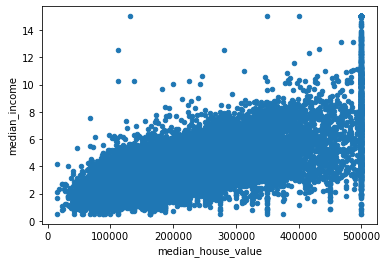

In [4]:
house_df.plot.scatter(x = 'median_house_value', y = 'median_income')

In [ ]:
house_df[['median_income', 'median_house_value']].corr(method='pearson')

In [ ]:
house_df.corr(method='pearson')

In [ ]:
house_df.plot.scatter(x = 'total_bedrooms', y = 'households')

##### Almost similar - using matplotlib plt function:

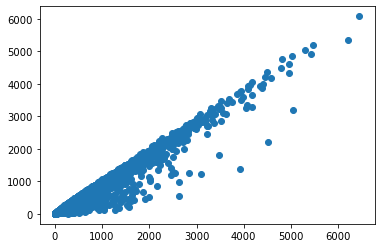

In [7]:
import matplotlib.pyplot as plt 
plt.scatter(house_df['total_bedrooms'], house_df['households'])

##### Using seaborn:

<AxesSubplot:xlabel='total_bedrooms', ylabel='households'>

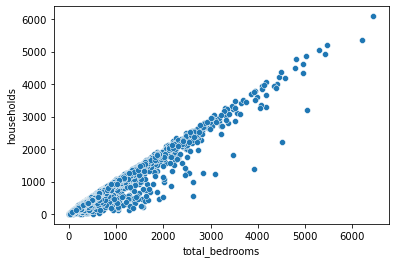

In [8]:
sns.scatterplot(data=house_df, x='total_bedrooms', y='households')

##### using seaborn with a regression line:

<AxesSubplot:xlabel='total_bedrooms', ylabel='households'>

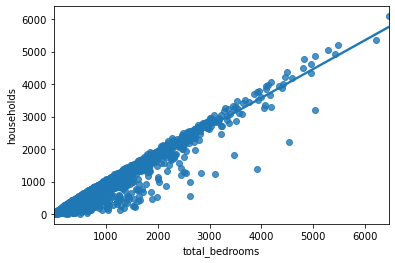

In [9]:
sns.regplot(data=house_df, x='total_bedrooms', y='households')

#### Scatterplots work when there are missing data

In [10]:
x = pd.Series(range(10, 20))
y = pd.Series([2, 1, 3, np.nan, 8, 3, 18, 25])
example_df = pd.DataFrame({'x': x, 'y': y})
example_df

,x,y
0,10,2.0
1,11,1.0
2,12,3.0
3,13,NaN
4,14,8.0
5,15,3.0
6,16,18.0
7,17,25.0
8,18,NaN
9,19,NaN


<AxesSubplot:xlabel='x', ylabel='y'>

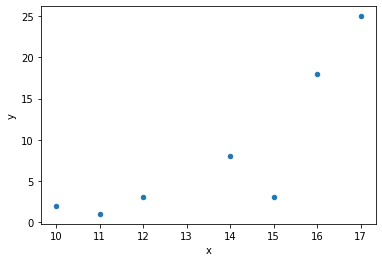

In [11]:
example_df.plot.scatter(x = 'x', y = 'y')

In [12]:
example_df.corr(method='pearson') 

,x,y
x,1.000000,0.831833
y,0.831833,1.000000


In [13]:
example_df.corr(method='spearman') 

,x,y
x,1.000000,0.900937
y,0.900937,1.000000


In [14]:
example_df.corr(method='kendall') 

,x,y
x,1.00000,0.78072
y,0.78072,1.00000


<a id='section2'></a>

### 2. Scatterplot matrix

The diagonal shows the distribution of the three numeric variables.

In the other cells of the plot matrix, we have the scatterplots of each variable combination in the dataframe. 

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_income', ylabel='housing_median_age'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>]],
      dtype=object)

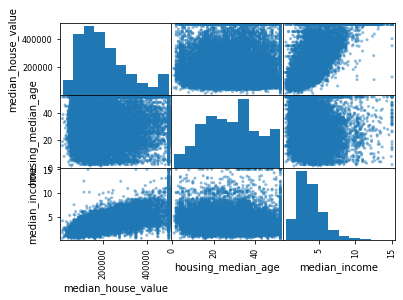

In [15]:
features = ['median_house_value', 'housing_median_age',
            'median_income']
pd.plotting.scatter_matrix(house_df[features])

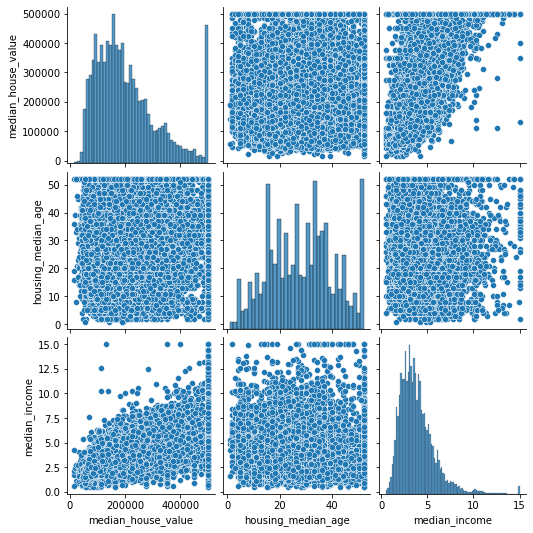

In [16]:
#sns.set()
sns.pairplot(house_df[features], height = 2.5)

<a id='section3'></a>

### 3. Heatmaps

##### Pandas doesn't contain a built-in heatmap function. We can try and create one by adding color to corr:

In [17]:
correlation_matrix = house_df[features].corr()
correlation_matrix.style.background_gradient(cmap='coolwarm')

,median_house_value,housing_median_age,median_income
median_house_value,1.000000,0.105623,0.688075
housing_median_age,0.105623,1.000000,-0.119034
median_income,0.688075,-0.119034,1.000000


In [18]:
correlation_matrix.style.background_gradient(cmap='Blues')

,median_house_value,housing_median_age,median_income
median_house_value,1.000000,0.105623,0.688075
housing_median_age,0.105623,1.000000,-0.119034
median_income,0.688075,-0.119034,1.000000


##### Or we can use seaborn

<AxesSubplot:>

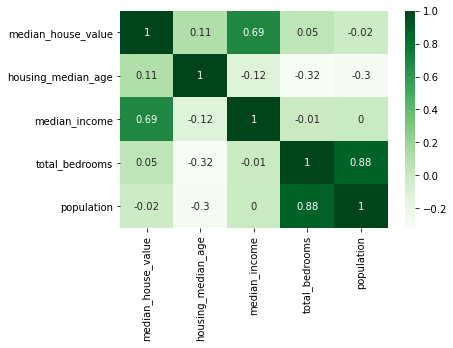

In [19]:
features = ['median_house_value', 'housing_median_age','median_income','total_bedrooms','population']
correlation_matrix = house_df[features].corr().round(2)
sns.heatmap(data=correlation_matrix,cmap='Greens', annot=True)

---
> ##### Summary
>
>* `.corr` - compute pairwise correlation of columns, excluding NA/null values. [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)
>
>* `.corr.style.background_gradient` - change the background color. [various options](corr.style.background_gradient)
>
>* `.plotting.scatter_matrix` - draw a matrix of scatter plots. [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html?highlight=scatter_matrix)
>
>* `.plot.scatter` - plot a scatter plot
>
> Seaborn package:
>
>* `sns.scatterplot` - a scatter plot
>
>* `sns.regplot` - a scatter plot with a regression line
>
>* `sns.pairplot` - scatter plot matrix
>
> * `sns.heatmap` - a heatmap. @annot = True to print the values inside the square
>
---